<a href="https://colab.research.google.com/github/dataeducator/image_classification_with_deep_learning/blob/main/image_classification_with_deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Final Project Submission:Image Classification Model with Deep Learning
(Phase 4)

- Student Name: Tenicka Norwood
- Program Pace: self paced
- Scheduled Project Review Time: Tues September 5, 2023 1pm
- Instructor name: Morgan Jones
- Blog post Url: https://medium.com/mlearning-ai/fueling-student-success-1723abd2991b

#### __Disclaimer:__
This Jupyter notebook and its contents are __intended solely for educational purposes__. The included business case and the results of the deep learning models should not be interpreted as medical advice, and have not received endorsement or approval from any professional or medical organization.

The models and outcomes presented here are for illustrative purposes __only__ and should __not__ be be utilized for making real-world decisions without consulting appropriate domain experts and medical professionals. Any actions taken based on the information in this notebook are at the user's own risk.
The author and contributors off this noteboo disclaim any liability for the accuracy, completeness, or efficacy of the information provided.

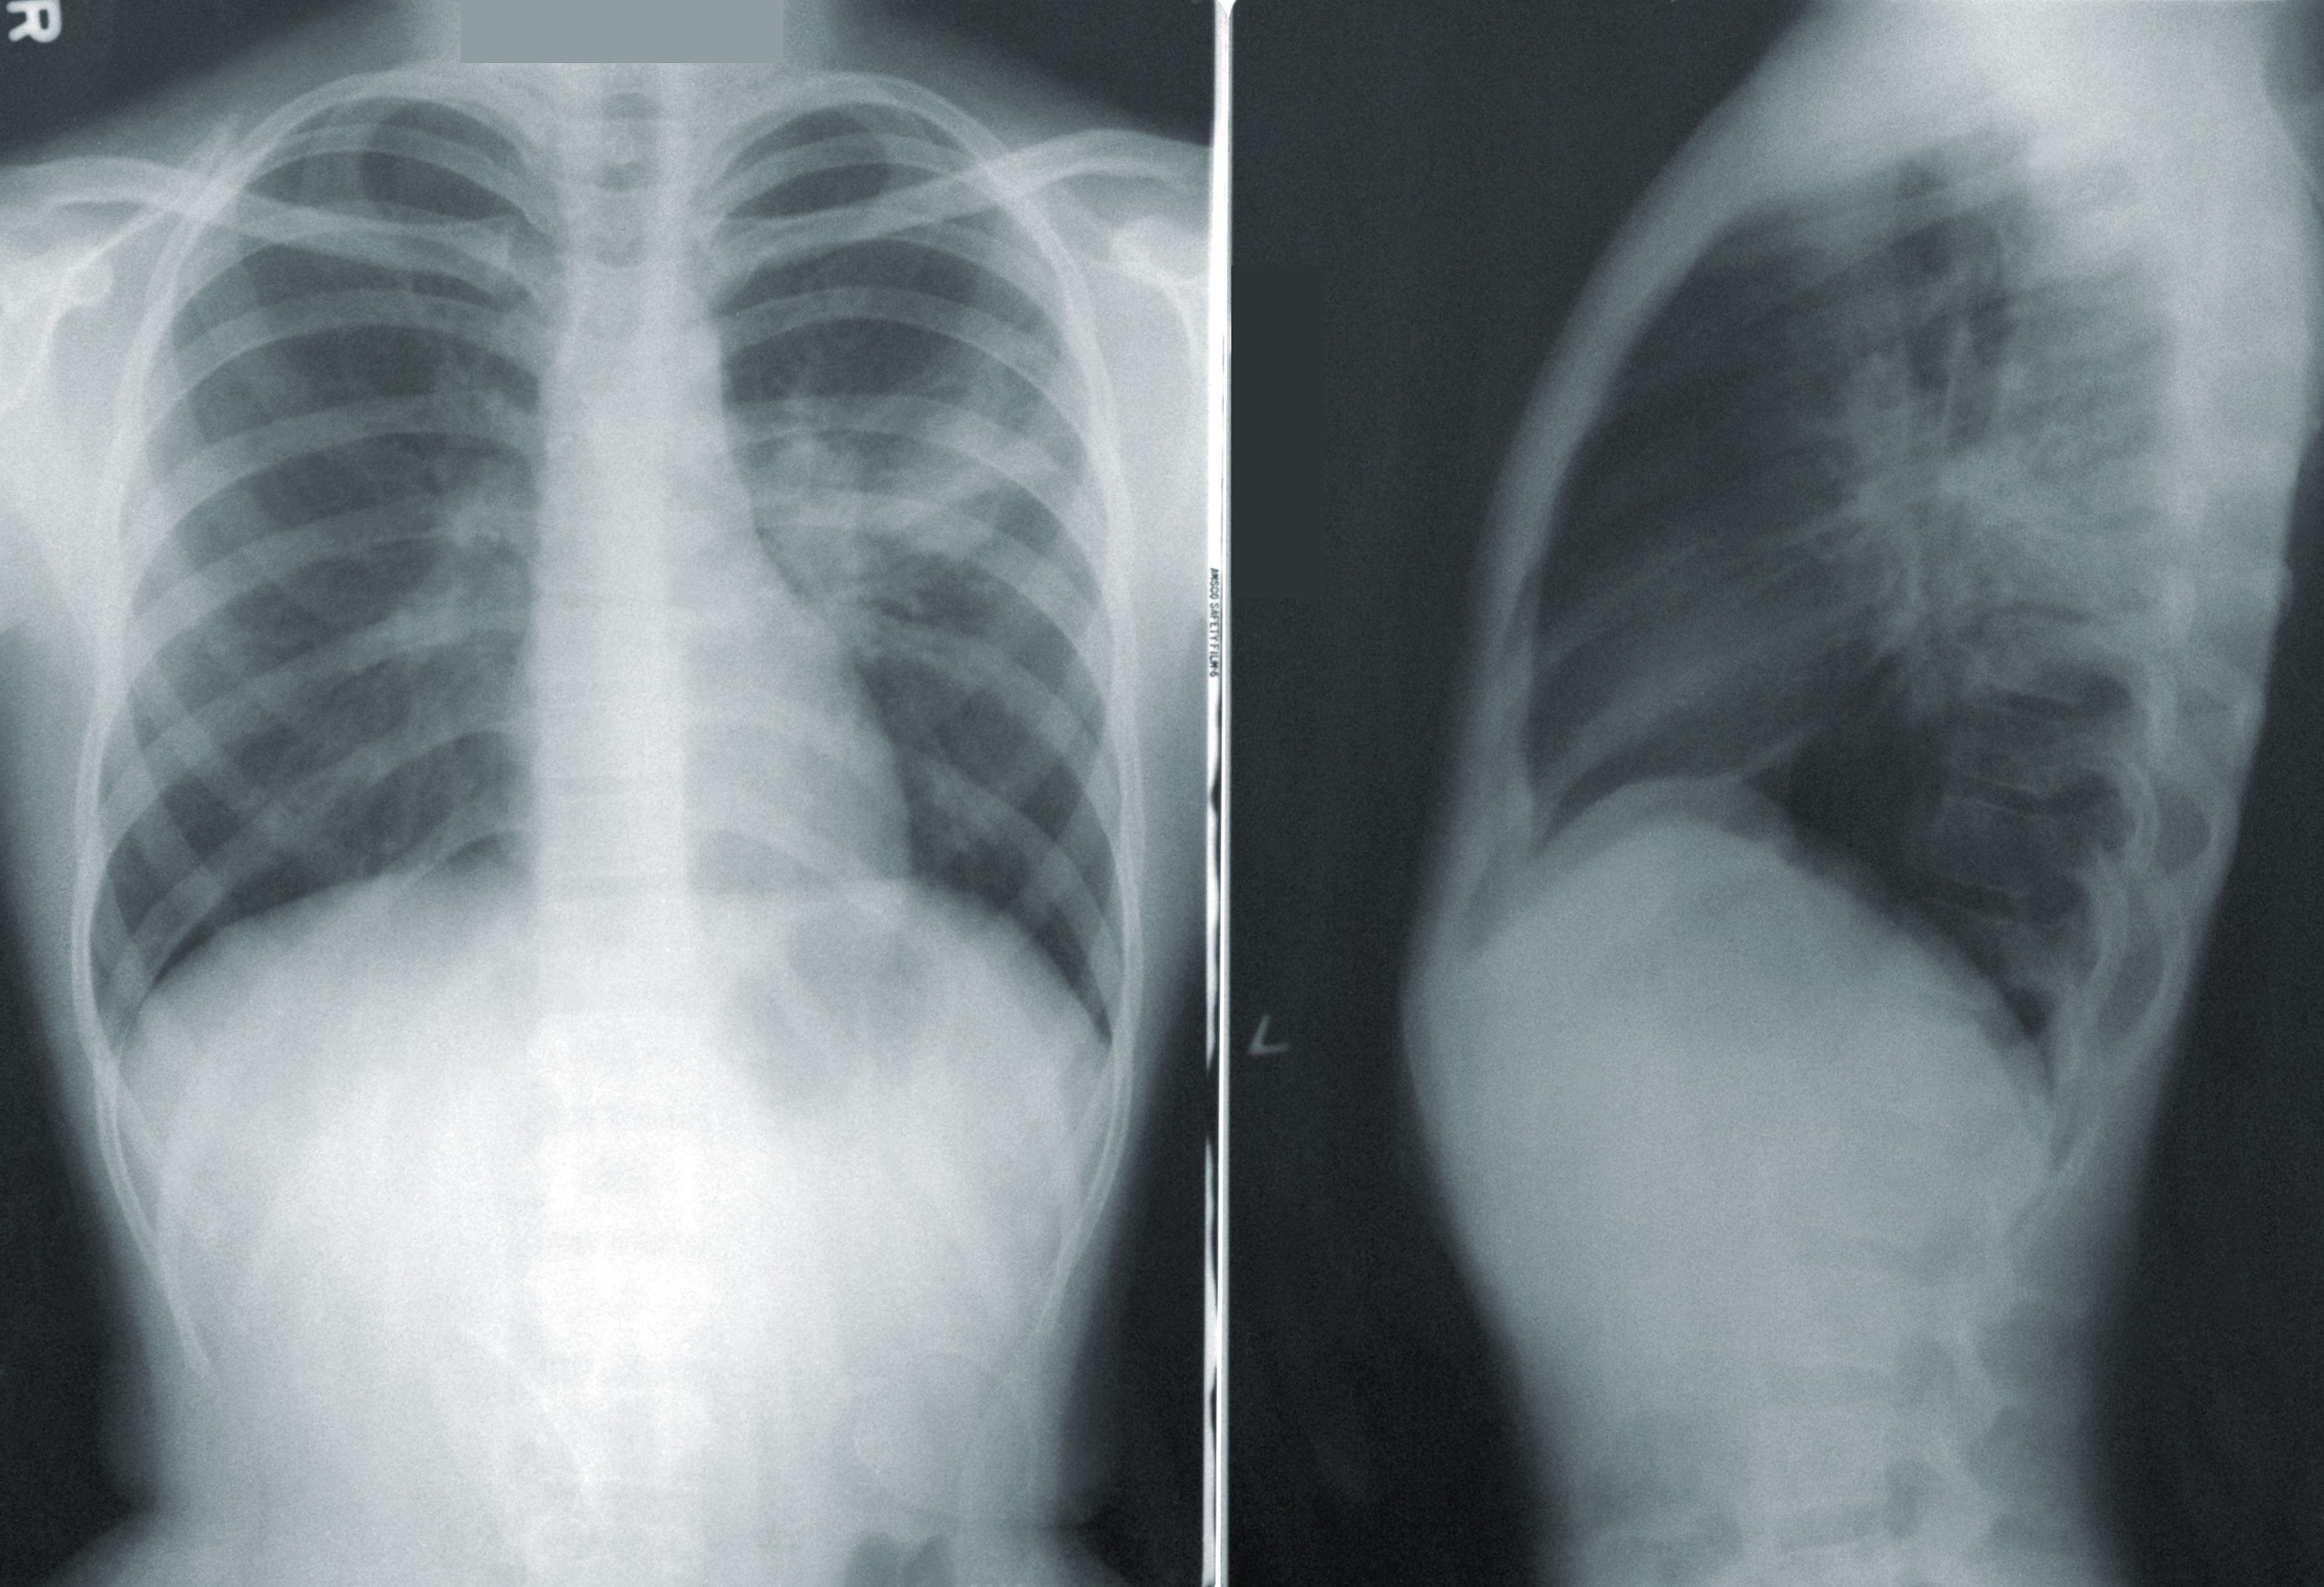





## __Business Case:__
* __Stakeholer__: Zephyr Health Services
* __Business Case__: I am a new data scientist at Zephyr Healthcare Solutions and have been taked with leveraging deep learnin to bolst the company's medical diagnostic systems. Zephyr's obective is to create an optimized Convolutional Neural Network (CNN) for precise pneumonia detection from chest X-ray images, aligning with our commitment to advancing diagnostic accuracy and patient care.

According to a 2022 report (click [here](https://www.jhsph.edu/ivac/wp-content/uploads/2019/10/PDPR_2022.pdf) for full report) by Johns Hopkins over _700 thousand children under 5__ die from pneumonia each year.

Objectives:
The main objectives of this project are:
- Develop a robust and efficient system for early childhood pneumonia detection using a Convolutional Neural Network(CNN) which detects the presence of pneumonia with a __high degree__ of precision.
- Generate a system that can be validated and deployed across a variety of healthcare settings, to reach underserved populations.


## __Metrics__
We will prioritize precision in this project over accuracy. We will also aim for balance between recall (sensitivity) while maintaining a high level of precision (specificity). With these objectives in mind, the  we aim to reduce the number of false positives and increase the model's ability to correctly identify patients with pneumonia. In this context, false positives could lead to unecessary treatment or interventions.
* __True positives__ are the cases when a model predicts positive instances correctly.
Ex. patients predicted to have PNEUMONIA and do have PNEUMONIA

*__False positives__ are the cases when a model predicts positive instances incorrectly.
Ex. patients predicted to have PNEUMONIA but the chest scan label is NORMAL.

*__False negatives__ are the cases when a model mispredicts negative instances.
Ex. patients predicted to have NORMAL chest scans and do have PNEUMONIA.

\begin{gathered}   
Precision =  \frac{True\ Positive}{True\ Positive + False\ Positive}
\end{gathered}
<br>

</br>

A high precision indicates that when our model predicts the presence of PNEUMONIA, the patient will likely have PNEUMONIA.
<br>

</br>
\begin{gathered}
Recall = \frac{True\ Positive}{False\ Negative + True\ Positive}
\end{gathered}
<br>

</br>

A high precision indicates that when our model predicts the presence of PNEUMONIA, the patient will likely have PNEUMONIA.

For our project we will use F1-score or the harmonic mean of recall and precision.

\begin{gathered}
F1-Score  = \frac{2 \cdot True\ Positive}{2 \cdot True\ Positive + False\ Positive + False\ Negative}
\end{gathered}

Our model will be successful where:

\begin{gathered}
F1-Score  >= .95
\end{gathered}

## __Data Understanding__

Chest X-ray images (anterior-posterior) were chose from cohorts of pediatric patients aged one to five years at the Guangzhou Women and Children's Medical Center in Guangzhou, China.

The images were obtained during routine clincial care. To ensure quality, all chest radiographs went through an initial screening to remove low-quality or unreadable scans.

Squsequently, two expert physicians grades the diagnoses of the images before they were used in training sets.

A third expert reviewed the validation set to mitigate any potential grading errors.

The dataset is orginally accredited to Kermany, Daniel; Zhang, Kang; Goldbaum, Michael (2018), “Labeled Optical Coherence Tomography (OCT) and Chest X-Ray Images for Classification”, Mendeley Data, V2, doi: 10.17632/rscbjbr9sj.2.


For ease of use we will use Kaggle to access a zip archive of this dataset later in this section.

### __Method__:
In this project, I will use the __OSEMiN__ pipeline to:

- Obtain → Import the data.
- Scrub → Manage the datatypes, and resolve missing data or duplicates.
- Explore → Identify patterns within the relationships between variables in the data.
- Model → Create a set of predictive models.
- iNterpret → Identify insights and create visualizations of findings.

For our model we could prioritize:

- accuracy - the proportion of correctly predicted labels out of all of the samples in the testing dataset.
- precision - measures the model's accuracy in predicting true positives as a proportion of all positives.
- recall- measures the model's ability to measure all positive instances correctly.
- f1-score - the harmonic mean of precision and recall, used when we want to consider both identifying true positives and minimizing false negatives.

# __Obtain__

### __ObtainData Class Description__

The <code>ObtainData</code> class is a utility class designed to retrieve datasets stored in Google Drive. This class provides an approach to mount Google Drive, verify the existence of a specified dataset folder, and extract its contents if necessary.

__Features:__
* Mounts Google Drive to the Colab environment, providing a user allows access to the files stored in thier Google Drive.
* Prompts the user to input the location of the dataset folder within their Google Drive
* Checks to see if the specified dataset folder exists and provides feedback to the user.
* If the dataset folder exists, this class provides a convenient way to access the dataset files.

__Usage:__
* Create an instance of the <code>ObtainData</code> class.
* Invoke the <code>get_dataset_location()</code> method to prompt the user to input the location of the dataset folder in their Google Drive.
* The class automatically verifies the existence of the specified folder and provides feedback accordingly.
* The dataset files can then be accessed and processed as needed.

In [1]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=0063d4bce44875c3846a2084d90f7363410961a22b4711c04c04b07a241919f6
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


### Import libraries and Visualization Packages
Importing libraries at the beginning allows access to modules and other tools throughout this project that help to make the tasks within this project manageable to implement. The main libraries used within this project include:

* <code>pandas</code>: a data analysis and manipulation library which allows for flexible reading, writing, and reshaping of data
* <code>numpy</code>: a key library that brings the computational power of languages like C to Python
* <code>matplotlib</code>: a comprehensive visualization library
* <code>seaborn</code>: a data visualization library based on matplotlib
* <code>tensorflow</code>: an open-source machine learning library developed by Google that enables the creation and training of machine learning models through computational graphs
* <code>keras</code> a key component of TensorFlow's ecosystem that provides a modular interface to design, build and train deep learning models
* <code>sklearn</code>: a machine learning libary for data processing and modeling.
*<code>lime</code> Local Interpretable Model-agnostic Explanations is a library designed to provide clear explanations for machine learning model predictions.

In [2]:
# Import libraries and visualization packages
import lime
from lime import lime_base, lime_image
from skimage.segmentation import mark_boundaries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline
import cv2, time
import datetime
import os
import shutil
import math
import tensorflow as tf
from keras.models import Sequential, Model
from keras.layers import Input, Flatten, Dropout, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG19, InceptionV3, resnet50
from sklearn.metrics import classification_report, confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

## Check library versions
Ensuring the reporducibility of results stands as a cornerstone of effective modeling. In the ever-evolving landscape of information, the refinement of models remains integral to advancing science. An inherent facet of collaborative success lies in transparently conveying the tool versions employed in model generation. This practice not only facilitates seamless collaboration but also equips fellow researchers with a foundation for their own endeavors to replicate this work. As such, we  document the versions of key libraries so that others may replicate and explore this data.

In [3]:
# Check Pandas version
print("Pandas version")
pd.__version__

Pandas version


'1.5.3'

In [4]:
# Check Numpy version
print("Numpy version")
np.__version__

Numpy version


'1.23.5'

In [5]:
# Check Seaborn version
print("Seaborn version")
sns.__version__

Seaborn version


'0.12.2'

In [6]:
# Check Tensorflow version
print("Tensorflow version")
tf.__version__

Tensorflow version


'2.12.0'

# Downloading and Preparing Pneumonia Dataset for Deep Learning Analysis
1. __Create or Log in to Your Kaggle Account:__
    If you do not already have a Kaggle account, create one. If you have an account log in.
2. __Access the Pneumonia Dataset:__
    Go to the following direct link to access Paul Timothy Mooney's Pneumonia dataset on Kaggle: [Pneumonia Dataset](https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia)
3. __Download the Dataset:__
    On the dataset page, you will see a "Download" button. Click on it to download the dataset.

     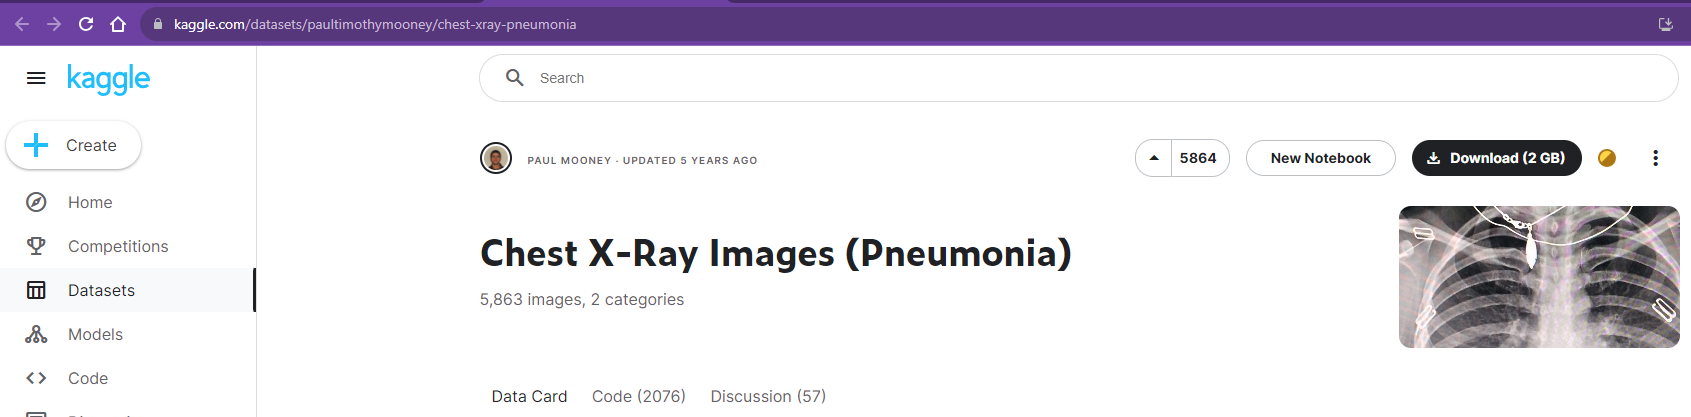
   
    The dataset is approximately __2GB__.

4. __Unzip the file Add the unzipped archive to your Google Drive:__
    After downloading and unzipping the dataset you'll have a folder named 'archive'. This folder contains the dataset. To use this notebook you will need to provide the location of the .zip file in your Google Drive.

5. __Run the next two cells withot making any chages__
    Mount your google drive to allow colab access to your google drive.
    Unzip the file so you can use the contents of this notebook.
    The file should include train, test and val folders that contain subfolders with both NORMAL and PNEUMONIA images.

In [7]:
from google.colab import drive

class ObtainData:
  """
  A class to obtain dataset location from Google Drive.

  Usage:
  data_obtainer = ObtainData()
  dataset_location = data_obtainer.get_dataset_location()
  """

  def __init__(self):
      self.drive_mounted = False

  def mount_drive(self):
    """
    Mounts Google Drive to '/content/drive'.
    """
    drive.mount('/content/drive')
    self.drive_mounted = True

  def get_dataset_location(self):
    """
    Prompts the user to enter the location of the datset folder in their Google Drive.
    Returns the full file path of the dataset location.
    """

    while True:
      # Munt Google Drive if not already mounted
      if not self.drive_mounted:
        self.mount_drive()

      # Provide a template for the user input
      example_input ="/MyDrive/Your_Folder_name/"
      dataset_location = input(f"Enter the location of the dataset folder in your Google Drive (e.g., {example_input}):")
      file_path = f'/content/drive{dataset_location}'

      # Check if the file exists
      if os.path.exists(file_path):
        print(f" The file '{dataset_location}' exists in your Google Drive.")
        return file_path
      else:
        print(f" The file '{dataset_location}' does not exist in your Google Drive. Please try again.")


In this section, we will set up a convenient way to access the dataset using the <code>ObtainData</code> class. This will help us to smoothly acquire the dataset's location from the connected Google Drive by interacting with the user using prompts. This step ensures that the required data is available for analysis.

In [8]:
# Create an instance of the ObtainData class
data_obtainer = ObtainData()

# Get the dataset location
dataset_location = data_obtainer.get_dataset_location()
print(f"Datatset location")

Mounted at /content/drive
Enter the location of the dataset folder in your Google Drive (e.g., /MyDrive/Your_Folder_name/):/MyDrive/classification/chest_xray
 The file '/MyDrive/classification/chest_xray' exists in your Google Drive.
Datatset location


Next we check the current working directory and if ensure that we are working in the dataset's location.

In [9]:
print(os.getcwd())

/content


In [10]:
os.chdir(dataset_location)
print(os.getcwd())

/content/drive/MyDrive/classification/chest_xray


### __DatasetPaths Class Description__
The <code>DatasetPaths</code> class is a utility class for managing paths within a dataset. This class simplifies file path retrieval and ensures efficient data handling. It alllows users to access specific file paths based on set names and class names.

__Features:__
* Defines attributes for different subsets(e.g. train, test, val) and class names(e.g. NORMAL and PNEUMONIA) in a dataset.
* Enables streamlined access to file paths for specific subsets and classes, reducing the complexity of file handling
* Offers a structured approach to organize and retrieve file paths, enhancing data manipulation and analysis.

__Usage:__
* Create an instance of the <code>DatasetPaths</code> class
* Utilize the attributes defined in the class to easily access file paths for different subsets and classes within the dataset.


In [11]:
class DatasetPaths:
  """
  Helper class to manage paths for different sets and classes of the dataset
  """

  def __init__(self, base_location):
    self.base_location = base_location
    self.class_names = ['NORMAL' , 'PNEUMONIA']
    self.set_names = ['train', 'test', 'val']

  def get_path(self,set_name, class_name):
    """
    Get the path for a specific set and class.

    Parameters:
        set_name(str): Name of the dataset set('train', 'test', 'val')
        class_name(str): Name of the class ('NORMAL' or 'PNEUMONIA')

    Returns:
        path(str): Path to the specified set and class.
    """
    return f"{self.base_location}/{set_name}/{class_name}"

  def get_all_paths(self):
    """
    Get a dictionary containing all paths for the dataset.

    Returns:
      paths(dict): Dictionary containing paths for each set and class.
    """

    paths = {}
    for set_name in self.set_names:
        paths[set_name] = {}
        for class_name in self.class_names:
          paths[set_name][class_name] = self.get_path(set_name, class_name)
    return paths


Here we create an instance of <code>DatasetPaths</code> class. This helps us establish the base location of the dataset in Google Drive. We use this to identify the location

In [12]:
# Provide the base location of the dataset in Google Drive
base_dataset_location = dataset_location

# Create an instance of the DatasetPaths class
dataset_paths = DatasetPaths(base_dataset_location)

# Get all paths using the DatasetPaths instance
all_paths = dataset_paths.get_all_paths()

# Print the paths
for set_name in dataset_paths.set_names:
    for class_name in dataset_paths.class_names:
        print(f"{set_name.capitalize()} {class_name}: {all_paths[set_name][class_name]}")


Train NORMAL: /content/drive/MyDrive/classification/chest_xray/train/NORMAL
Train PNEUMONIA: /content/drive/MyDrive/classification/chest_xray/train/PNEUMONIA
Test NORMAL: /content/drive/MyDrive/classification/chest_xray/test/NORMAL
Test PNEUMONIA: /content/drive/MyDrive/classification/chest_xray/test/PNEUMONIA
Val NORMAL: /content/drive/MyDrive/classification/chest_xray/val/NORMAL
Val PNEUMONIA: /content/drive/MyDrive/classification/chest_xray/val/PNEUMONIA


Next let's leverage the methods and attributed of the <code>DatasetPaths</code> class to obtain paths and print the number of images for each set and each class.

In [27]:
# Create a dictionary to store the number of images in each class for each set
num_images_dict = {}

# Loop through sets and classes to count images
for set_name in dataset_paths.set_names:
    num_images_dict[set_name] = {}
    for class_name in dataset_paths.class_names:
        # Get the path using the DatasetPaths class
        path = dataset_paths.get_path(set_name, class_name)

        # Count the number of images in the directory
        num_images = len(os.listdir(path))

        # Store the count in the num_images_dict
        num_images_dict[set_name][class_name] = num_images

        # Print the count
        print(f" {set_name.capitalize()} {class_name}: {num_images} images")

 Train NORMAL: 1341 images
 Train PNEUMONIA: 3875 images
 Test NORMAL: 234 images
 Test PNEUMONIA: 390 images
 Val NORMAL: 8 images
 Val PNEUMONIA: 8 images


In this section, we used the <code>DatasetPaths</code> class to calculate and display the distributeion of images across different sets and classess within the dataset. The output displays the number of images for each combination of training, testing, and validation sets along with the two class categories: 'NORMAL' and 'PNEUMONIA'. Next, we will create a visualization to get a quick view of the dataset's composition.

__ClassDistributionPlot Class Description__

The <code>ClassDistributionPlot</code> class is a helper class designed to create bar plot to visualize the distribution of classes across different dataset sets.

__Features:__
* Uses the <code>DatasetPaths</code> class to manage and access dataset paths.
* Accepts a dictionary containing the count of images per class for each dataset set.
* Aligns bars for each class for comparison
* Adopts the <code>fivethirthyeight</code> style for consistency.

__Usage:__
1. Create an instance of the <code>DatasetPaths</code> class.
2. Create an instance of the <code>ClassDistributionPlot</code> class, providing a dictionary with the class distribtion data.
3. Use the <code>plot()</code> method to generate bar plots that illustrate class distribution across different sets.

In [28]:
class ClassDistributionPlot:
    """
    Helper class to create class distribution plots for different dataset sets.
    """

    def __init__(self, dataset_paths, set_names, class_names):
        """
        Initialize the ClassDistributionPlot instance.

        Parameters:
            dataset_paths (DatasetPaths): An instance of the DatasetPaths class.
            set_names (list): List of dataset set names ('train', 'test', 'val').
            class_names (list): List of class names.
        """
        self.dataset_paths = dataset_paths
        self.set_names = set_names
        self.class_names = class_names

    def plot_distribution(self):
        """
        Create and display class distribution plots for different dataset sets.
        """
        plt.style.use('fivethirtyeight')
        plt.figure(figsize=(10, 8))
        x = range(len(self.class_names))

        for i, set_name in enumerate(self.set_names):
            num_images_per_class = [
                len(os.listdir(self.dataset_paths.get_path(set_name, class_name)))
                for class_name in self.class_names
            ]
            plt.bar([j + i * 0.2 for j in x], num_images_per_class, width=0.2,
                    align='center', label=set_name.capitalize())

        plt.xlabel('Class')
        plt.ylabel('Number of Images')
        plt.title('Class Distribution Across Sets')
        plt.xticks([i + 0.2 for i in x], self.class_names)
        plt.legend()

        plt.tight_layout()
        plt.show()

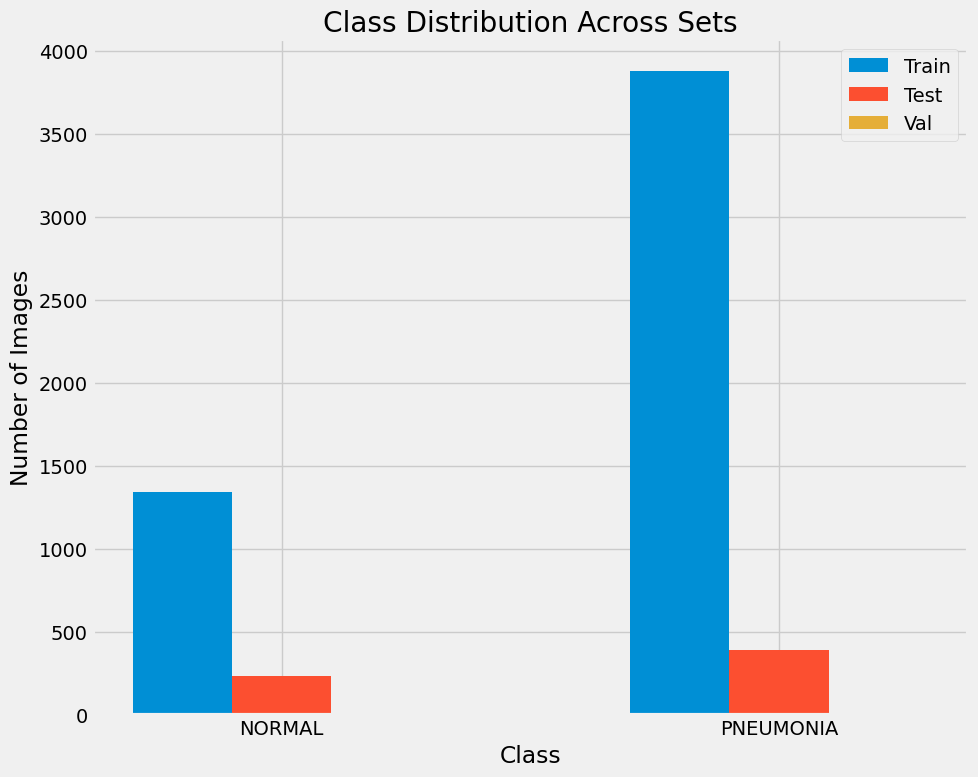

In [29]:
# Extract class names and corresponding number of images for each class
set_names = dataset_paths.set_names
class_names = dataset_paths.class_names
num_images_per_class = {
    'train': [num_images_dict['train'][class_name] for class_name in class_names],
    'test': [num_images_dict['test'][class_name] for class_name in class_names],
    'val': [num_images_dict['val'][class_name] for class_name in class_names]
}

# Create an instance of the ClassDistributionPlot class
distribution_plot = ClassDistributionPlot(dataset_paths, set_names, class_names)

# Plot and display class distribution
distribution_plot.plot_distribution()

In [30]:
import random
class ImageBalancer:
    """
    Helper class to balance the number of images between different classes in a dataset.
    """

    def __init__(self, dataset_paths, class_names, set_names, target_set_name):
        """
        Initialize the ImageBalancer instance.

        Parameters:
            dataset_paths (DatasetPaths): An instance of the DatasetPaths class.
            class_names (list): List of class names.
            set_names (list): List of dataset set names ('train', 'test', 'val').
            target_set_name (str): The name of the dataset set to balance.
        """
        self.dataset_paths = dataset_paths
        self.class_names = class_names
        self.set_names = set_names
        self.target_set_name = target_set_name

    def balance_images(self):
        """
        Balance the number of images between classes in the target dataset set.
        """
        target_set_path = self.dataset_paths.get_path(self.target_set_name, '')

        # Find the desired number of images as the minimum number of images in subfolders of each class
        desired_num_images = min(
            [len(os.listdir(self.dataset_paths.get_path(self.target_set_name, class_name))) for class_name in self.class_names]
        )

        for class_name in self.class_names:
            class_images = os.listdir(self.dataset_paths.get_path(self.target_set_name, class_name))
            random_class_images = random.sample(class_images, desired_num_images)
            new_class_path = os.path.join(target_set_path, class_name + '_balanced')
            os.makedirs(new_class_path, exist_ok=True)

            for image in random_class_images:
                src = os.path.join(self.dataset_paths.get_path(self.target_set_name, class_name), image)
                dst = os.path.join(new_class_path, image)
                shutil.copy(src, dst)


In [31]:
# Create an instance of the ImageBalancer class
image_balancer = ImageBalancer(dataset_paths, class_names, set_names, target_set_name='train')

# Balance the images in the target dataset
image_balancer.balance_images()

print("Target set balanced")

Target set balanced


In [ ]:
#train_pneumonia_path = new_train_pneumonia_path

In [ ]:
class_names = ['PNEUMONIA', 'NORMAL']

# Calculate the new number of images after balancing
new_num_images_dict = {}
for class_name in class_names:
    path_var_name = f'train_{class_name.lower()}_path'
    path = locals()[path_var_name]
    new_num_images = len(os.listdir(path))
    new_num_images_dict[class_name] = new_num_images
    print(f'New Number of Training {class_name} Images: {new_num_images}')

# Set up the figure and axes
plt.figure(figsize=(10, 8))
x = range(len(class_names))

# Plot the updated class distributions
plt.bar(x, new_num_images_dict.values(), align='center')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('Updated Training Data Class Distribution After Balancing')
plt.xticks(x, class_names)

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
# Set the paths for original and balanced pneumonia data

#balanced_pneumonia_path = '/content/drive/MyDrive/Projects/phase4/pneumonia_dataset/chest_xray/chest_xray/train/PNEUMONIA_balanced'
balanced_pneumonia_path = train_path + '/PNEUMONIA_balanced'
#destination_path_balanced_pneumonia = '/content/drive/MyDrive/classification/pneumonia_dataset/chest-xray-pneumonia/chest_xray/chest_xray/balanced_train/PNEUMONIA'
destination_path_balanced_pneumonia = drive_path + '/balanced_train/PNEUMONIA'

# Create the destination directory if it doesn't exist
os.makedirs(destination_path_balanced_pneumonia, exist_ok=True)

# Move the balanced pneumonia data to the destination folder
for image_name in os.listdir(balanced_pneumonia_path):
    src = os.path.join(balanced_pneumonia_path, image_name)
    dst = os.path.join(destination_path_balanced_pneumonia, image_name)
    shutil.move(src, dst)

print("Balanced pneumonia data moved to 'balanced_train' folder.")



In [ ]:
# Create a balanced training dataset in a single folder
original_NORMAL_path = train_path +'/NORMAL'
#destination_path_NORMAL= '/content/drive/MyDrive/classification/pneumonia_dataset/chest-xray-pneumonia/chest_xray/chest_xray/balanced_train/NORMAL'
destination_path_NORMAL = drive_path +'/balanced_train/NORMAL'
# Create the destination directory if it doesn't exist
os.makedirs(destination_path_NORMAL, exist_ok=True)

# Move original NORMAL data to the destination folder
for image_name in os.listdir(original_NORMAL_path):
    src = os.path.join(original_NORMAL_path, image_name)
    dst = os.path.join(destination_path_NORMAL, image_name)
    shutil.move(src, dst)

print("NORMAL data moved to 'balanced_train' folder.")

# Scrub

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

def count_images(directory, class_names):
    """
    Count the number of images in each class for each set.

    Parameters:
      directory(str): Path to the directory containing sets of images.
      class_names(list): List of class names to count im|ages

    Returns:
      counts(dict): A dictionary containing the counts of images for each set and class.
    """
    counts = {}
    for set_name in os.listdir(directory):
        set_path = os.path.join(directory, set_name)
        if os.path.isdir(set_path):
            counts[set_name] = {}
            for class_name in class_names:
                class_path = os.path.join(set_path, class_name)
                if os.path.exists(class_path):
                    num_images = len(os.listdir(class_path))
                    counts[set_name][class_name] = num_images
    return counts

# Common parameters
image_size = (224, 224)
class_names = ['NORMAL', 'PNEUMONIA']

train_data_path = drive_path + '/balanced_train'
test_data_path = drive_path + '/test'
val_data_path = drive_path + '/val'

batch_size_train = count_images(train_data_path, class_names)
batch_size_test = count_images(test_data_path, class_names)
batch_size_val = count_images(val_data_path, class_names)

def create_data_generator(directory, batch_size):
    """
    Create a data generator for the specified directory.

    Parameters:
      directory (str): Path to the directory containing image data.
      batch_size(int): Batch size for the data generator.

    Returns:
      data_generator: An ImageDataGenerator object configured with the directory, batch_size, and other parameters
    """
    return ImageDataGenerator(rescale=1./255).flow_from_directory(
        directory,
        target_size=image_size,
        batch_size=batch_size,
        class_mode='binary',
        seed=42
    )
train_generator = create_data_generator(train_data_path, batch_size_train)
test_generator = create_data_generator(test_data_path, batch_size_test)
val_generator = create_data_generator(val_data_path, batch_size_val)




In [ ]:
def create_data_generator(directory, batch_size):
  """
  Create a data generator for the specified directory.

  Parameters:
  directory (str): Path to the directory containing image data.
  batch_size(int): Batch size for the data generator.

  Returns:
  data_generator: An ImageDataGenerator object configured with the
                  directory, batch_size, and other parameters
  """

  normalization_params ={
      'NORMAL': {'rescale':1.0/255.0},
      'PNEUMONIA':{'rescale':1.0/255.0}
  }

  class_mode = 'binary'

  return ImageDataGenerator(**normalization_params[class_name]).flow_from_directory(
      directory,
      target_size=image_size,
      batch_size=batch_size,
      class_mode=class_mode,
      seed=42

  )

In [ ]:
import random

def plot_sample_images(data_generator, class_name, num_images=16, num_rows=4, num_cols=4, figsize=(10, 10)):
    """
    Plot sample images from the specified data generator for a specific class.

    Parameters:
        data_generator: An ImageDataGenerator object.
        class_name(str): The class for which to plot sample images.
        num_images(int): Number of sample images to plot.
        num_rows(int): Number of rows in the plot array.
        num_cols(int): Number of columns in the plot array.
        figsize(tuple): Figure size for the plot.
    """

    class_index = class_names.index(class_name)
    class_indices = [index for index, label in enumerate(data_generator.labels) if label == class_index]
    random_class_indices = random.sample(class_indices, num_images)

    plt.figure(figsize=figsize)
    plt.suptitle(class_name, fontsize=16)

    for i, index in enumerate(random_class_indices):
        plt.subplot(num_rows, num_cols, i + 1)
        image = data_generator._get_batches_of_transformed_samples([index])[0][0]
        plt.imshow(image)
        plt.axis('off')

    # Add an empty subplot for the white space
    plt.subplot(num_rows, num_cols, num_images + 1)
    plt.axis('off')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# Plot sample images for NORMAL class
plot_sample_images(train_generator, class_name='NORMAL', num_images=16, num_rows=5, num_cols=4, figsize=(12, 12))

# Plot sample images for PNEUMONIA class
plot_sample_images(train_generator, class_name='PNEUMONIA', num_images=16, num_rows=5, num_cols=4, figsize=(12, 12))

# Explore

In [ ]:
# Set the style to 'fivethirtyeight'
plt.style.use('fivethirtyeight')

def plotHistogram(image, class_name):
    """
    Plot histogram of RGB Pixel Intensities for a single image.

    Parameters:
        image: Image array with shape (height, width, channels).
        class_name: Name of the class ('NORMAL' or 'PNEUMONIA').
    """
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(image)
    plt.axis('off')

    hist = plt.subplot(1, 2, 2)
    hist.set_ylabel('Count')
    hist.set_xlabel('Pixel Intensity')

    n_bins = 30
    plt.hist(image[:, :, 0].flatten(), bins=n_bins, lw=0, color='r', alpha=0.3, label='Red Channel')
    plt.hist(image[:, :, 1].flatten(), bins=n_bins, lw=0, color='g', alpha=0.3, label='Green Channel')
    plt.hist(image[:, :, 2].flatten(), bins=n_bins, lw=0, color='b', alpha=0.3, label='Blue Channel')

    plt.legend()
    plt.title(f'RGB Histogram for {class_name} Image')

  #  # Set the alpha (transparency) for the histograms
 #   for rect in hist.patches:
 #       rect.set_alpha(0.2)

 #   plt.tight_layout()
#    plt.show()


In [ ]:
def plotHistogram(image, class_name):
    """
    Plot histograms of RGB Pixel Intensities for a single image on separate axes.

    Parameters:
        image: Image array with shape (height, width, channels).
        class_name: Name of the class ('NORMAL' or 'PNEUMONIA').
    """
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 4, 1)
    plt.imshow(image)
    plt.axis('off')

    for channel_idx, channel_name in enumerate(['Red', 'Green', 'Blue']):
        plt.subplot(1, 4, channel_idx + 2)
        plt.hist(image[:, :, channel_idx].flatten(), bins=30, color=channel_name.lower(), alpha=0.5)
        plt.xlabel('Pixel Intensity')
        plt.ylabel('Count')
        plt.title(f'{channel_name} Channel')

    plt.tight_layout()
    plt.show()

In [ ]:
batch_size_train = {
    'NORMAL': 1,    # Batch size for the 'NORMAL' class
    'PNEUMONIA': 1  # Batch size for the 'PNEUMONIA' class
}
# Recreate the data generator for the train directory
train_generator = create_data_generator(train_data_path, batch_size_train['NORMAL'])
print(batch_size_train['NORMAL'])
# Get a batch of sample data from the data generator
batch_images, batch_labels = next(train_generator)

# Find indices of NORMAL and PNEUMONIA images
normal_indices = np.where(batch_labels == 0)[0]
pneumonia_indices = np.where(batch_labels == 1)[0]

# Plot histograms for NORMAL images
for index in normal_indices:
    plotHistogram(batch_images[index], class_name='NORMAL')

# Plot histograms for PNEUMONIA images
for index in pneumonia_indices:
    plotHistogram(batch_images[index], class_name='PNEUMONIA')

In [ ]:
# Plot RGB histogram for PNEUMONIA images
plotHistogram(sample_image[1], class_name='PNEUMONIA')

# Model

## Brief introduction to CNNs

he way animals understand images is a fascinating  process. According to Sarvamangala and Kulkarni (click [here](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7778711/#CR9) for full text), a Convolutional Neural Networks is a deep learning algorithm that is inspired by the visual cortex of animal brains and aims to imitate the visual machinery of animals. CNNS have convolution layers, activation functions, pooling and fully connected laryers as their building blocks and are made of convolution have learnable weights and biases similar to neurons.

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
# Set image dimensions and classes
input_shape = (224, 224, 3)
num_classes = 2

# Create data generators for train and test sets
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

train_data = train_generator.flow_from_directory(
    train_data_path,
    target_size=input_shape[:2],
    batch_size=32,
    class_mode='binary'
)

test_data = test_generator.flow_from_directory(
    test_data_path,
    target_size=input_shape[:2],
    batch_size=32,
    class_mode='binary'
)

# Create the baseline CNN model
baseline_model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=input_shape),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),  # Missing comma here
    MaxPooling2D(2,2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

# Compile the model
baseline_model.compile(optimizer='adam',
                       loss='sparse_categorical_crossentropy',
                       metrics=['accuracy'])

# Train the model
history = baseline_model.fit(
    train_data,
    steps_per_epoch=train_data.samples // train_data.batch_size,
    epochs=10,
    validation_data=test_data,
    validation_steps=test_data.samples // test_data.batch_size
)

# Evaluate the model on the test data
test_loss, test_accuracy = baseline_model.evaluate(test_data)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

# Predict labels for the test data
y_pred = baseline_model.predict(test_data)
y_pred_binary = np.argmax(y_pred, axis=1)  # Convert probabilities to binary predictions

# True labels for the test data
y_true = test_data.classes

# Print classification report (F1-score, precision, accuracy, recall)
report = classification_report(y_true, y_pred_binary, target_names=test_data.class_indices)
print("Classification Report: \n", report)

In [ ]:
# Print the summary of the model

baseline_model.summary()

In [ ]:
# Save a visualization of the model's architecture to a file
plot_model(baseline_model, to_file='baseline_model_architecture.png', show_shapes=True,show_layer_names=True)

In [ ]:
# Generate confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

In [ ]:
# Plot precision and loss for each epoch
plt.figure(figsize=(12,10))
plt.subplot(1,2,1)
plt.plot(hisory.history['precision'], label='Training Precision')
plt.plot(history.history['val_precision'], label='Validation Precision')
plt.title('Precision')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


# Interpret